# Setting the `seasonal` value in STL

If you've been through the STL Decomposition notebook, you'll know how to use `STL` to decompose a series into its Trend, Seasonal and Residual components. You'll also know that the `seasonal` parameter should be changed for most applications. This notebook helps you choose an appropriate value. Let's first perform the same seasonal decomposition on the CO</sub>2</sub> dataset we did before: 

In [1]:
import calendar
import statsmodels.nonparametric.smoothers_lowess as sl
import pandas as pd
import matplotlib as mpl

In [2]:
co2_ = [
                      315.71, 317.45, 317.51, 317.27, 315.87, 314.93, 313.21, 312.42, 313.33, 314.67 #1958
    , 315.58, 316.49, 316.65, 317.72, 318.29, 318.15, 316.54, 314.80, 313.84, 313.33, 314.81, 315.58 #1959
    , 316.43, 316.98, 317.58, 319.03, 320.03, 319.58, 318.18, 315.90, 314.17, 313.83, 315.00, 316.19 #1960
    , 316.89, 317.70, 318.54, 319.48, 320.58, 319.77, 318.56, 316.79, 314.99, 315.31, 316.10, 317.01 #1961
    , 317.94, 318.55, 319.68, 320.57, 321.02, 320.62, 319.61, 317.40, 316.24, 315.42, 316.69, 317.70 #1962
    , 318.74, 319.07, 319.86, 321.38, 322.24, 321.49, 319.74, 317.77, 316.21, 315.99, 317.07, 318.35 #1963
    , 319.57, 320.04, 320.75, 321.84, 322.25, 321.89, 320.44, 318.69, 316.71, 316.87, 317.68, 318.71 #1964
    , 319.44, 320.44, 320.89, 322.14, 322.17, 321.87, 321.21, 318.87, 317.82, 317.30, 318.87, 319.42 #1965
    , 320.62, 321.60, 322.39, 323.70, 324.08, 323.75, 322.37, 320.36, 318.64, 318.10, 319.78, 321.02 #1966
    , 322.33, 322.50, 323.03, 324.41, 325.00, 324.09, 322.54, 320.92, 319.25, 319.39, 320.73, 321.96 #1967
    , 322.57, 323.15, 323.89, 325.02, 325.57, 325.36, 324.14, 322.11, 320.33, 320.25, 321.32, 322.89 #1968
    , 324.00, 324.41, 325.63, 326.66, 327.38, 326.71, 325.88, 323.66, 322.38, 321.78, 322.85, 324.11 #1969
    , 325.06, 325.99, 326.93, 328.13, 328.08, 327.67, 326.34, 324.68, 323.10, 323.06, 324.01, 325.13 #1970
    , 326.17, 326.69, 327.18, 327.78, 328.93, 328.57, 327.36, 325.43, 323.36, 323.56, 324.80, 326.01 #1971
    , 326.77, 327.63, 327.75, 329.72, 330.07, 329.09, 328.04, 326.32, 324.84, 325.20, 326.50, 327.55 #1972
    , 328.55, 329.57, 330.30, 331.50, 332.48, 332.07, 330.87, 329.31, 327.52, 327.19, 328.17, 328.65 #1973
    , 329.36, 330.71, 331.49, 332.65, 333.19, 332.20, 331.07, 329.15, 327.33, 327.28, 328.31, 329.58 #1974
    , 330.73, 331.46, 331.94, 333.11, 333.95, 333.42, 331.97, 329.95, 328.49, 328.36, 329.38, 330.78 #1975
    , 331.56, 332.74, 333.36, 334.74, 334.72, 333.97, 333.08, 330.68, 328.96, 328.72, 330.16, 331.62 #1976
    , 332.68, 333.17, 334.96, 336.14, 336.93, 336.17, 334.89, 332.56, 331.29, 331.28, 332.46, 333.60 #1977
    , 334.94, 335.26, 336.66, 337.69, 338.02, 338.01, 336.50, 334.42, 332.36, 332.45, 333.76, 334.91 #1978
    , 336.14, 336.69, 338.27, 338.82, 339.24, 339.26, 337.54, 335.72, 333.97, 334.24, 335.32, 336.81 #1979
    , 337.90, 338.34, 340.07, 340.93, 341.45, 341.36, 339.45, 337.67, 336.25, 336.14, 337.30, 338.29 #1980
    , 339.29, 340.55, 341.63, 342.60, 343.04, 342.54, 340.82, 338.48, 336.95, 337.05, 338.58, 339.91 #1981
    , 340.93, 341.76, 342.78, 343.96, 344.77, 343.88, 342.42, 340.24, 338.37, 338.41, 339.44, 340.78 #1982
    , 341.57, 342.78, 343.37, 345.40, 346.14, 345.76, 344.32, 342.51, 340.46, 340.53, 341.79, 343.20 #1983
    , 344.21, 344.92, 345.68, 347.38, 347.78, 347.16, 345.79, 343.74, 341.59, 341.86, 343.31, 345.00 #1984
    , 345.48, 346.41, 347.91, 348.66, 349.28, 348.65, 346.90, 345.26, 343.47, 343.35, 344.73, 346.12 #1985
    , 346.78, 347.48, 348.25, 349.86, 350.52, 349.98, 348.25, 346.17, 345.48, 344.82, 346.22, 347.48 #1986
    , 348.73, 348.92, 349.81, 351.40, 352.15, 351.58, 350.21, 348.20, 346.66, 346.72, 348.08, 349.28 #1987
    , 350.51, 351.70, 352.50, 353.67, 354.35, 353.88, 352.80, 350.49, 348.97, 349.37, 350.42, 351.62 #1988
    , 353.07, 353.43, 354.08, 355.72, 355.95, 355.44, 354.05, 351.84, 350.09, 350.33, 351.55, 352.91 #1989
    , 353.86, 355.10, 355.75, 356.38, 357.38, 356.39, 354.89, 353.06, 351.38, 351.69, 353.14, 354.41 #1990
    , 354.93, 355.82, 357.33, 358.77, 359.23, 358.23, 356.30, 353.97, 352.34, 352.43, 353.89, 355.21 #1991
    , 356.34, 357.21, 357.97, 359.22, 359.71, 359.44, 357.15, 354.99, 353.01, 353.41, 354.42, 355.68 #1992
    , 357.10, 357.42, 358.59, 359.39, 360.30, 359.64, 357.45, 355.76, 354.14, 354.23, 355.53, 357.03 #1993
    , 358.36, 359.04, 360.11, 361.36, 361.78, 360.94, 359.51, 357.59, 355.86, 356.21, 357.65, 359.10 #1994
    , 360.04, 361.00, 361.98, 363.44, 363.83, 363.33, 361.78, 359.33, 358.32, 358.14, 359.61, 360.82 #1995
    , 362.20, 363.36, 364.28, 364.69, 365.25, 365.06, 363.69, 361.55, 359.69, 359.72, 361.04, 362.39 #1996
    , 363.24, 364.21, 364.65, 366.49, 366.77, 365.73, 364.46, 362.40, 360.44, 360.97, 362.65, 364.51 #1997
    , 365.39, 366.10, 367.36, 368.79, 369.56, 369.13, 367.98, 366.10, 364.16, 364.54, 365.67, 367.30 #1998
    , 368.35, 369.28, 369.84, 371.15, 371.12, 370.46, 369.61, 367.06, 364.95, 365.52, 366.88, 368.26 #1999
    , 369.45, 369.71, 370.75, 371.98, 371.75, 371.87, 370.02, 368.27, 367.15, 367.18, 368.53, 369.83 #2000
    , 370.76, 371.69, 372.63, 373.55, 374.03, 373.40, 371.68, 369.78, 368.34, 368.61, 369.94, 371.42 #2001
    , 372.70, 373.37, 374.30, 375.19, 375.93, 375.69, 374.16, 372.03, 370.92, 370.73, 372.43, 373.98 #2002
    , 375.07, 375.82, 376.64, 377.92, 378.78, 378.46, 376.88, 374.57, 373.34, 373.31, 374.84, 376.17 #2003
    , 377.17, 378.05, 379.06, 380.54, 380.80, 379.87, 377.65, 376.17, 374.43, 374.63, 376.33, 377.68 #2004
    , 378.63, 379.91, 380.95, 382.48, 382.64, 382.40, 380.93, 378.93, 376.89, 377.19, 378.54, 380.30 #2005
    , 381.58, 382.40, 382.86, 384.80, 385.22, 384.24, 382.65, 380.60, 379.04, 379.33, 380.35, 382.02 #2006
    , 383.10, 384.12, 384.81, 386.73, 386.78, 386.33, 384.73, 382.24, 381.20, 381.37, 382.70, 384.19 #2007
    , 385.78, 386.06, 386.28, 387.33, 388.78, 387.99, 386.61, 384.32, 383.41, 383.22, 384.41, 385.79 #2008
    , 387.17, 387.70, 389.04, 389.76, 390.36, 389.70, 388.24, 386.29, 384.95, 384.64, 386.23, 387.63 #2009
    , 388.91, 390.41, 391.37, 392.67, 393.21, 392.38, 390.41, 388.54, 387.03, 387.43, 388.87, 389.99 #2010
    , 391.50, 392.05, 392.80, 393.44, 394.41, 393.95, 392.72, 390.33, 389.28, 389.19, 390.48, 392.06 #2011
    , 393.31, 394.04, 394.59, 396.38, 396.93, 395.91, 394.56, 392.59, 391.32, 391.27, 393.20, 394.57 #2012
    , 395.78, 397.03, 397.66, 398.64, 400.02, 398.81, 397.51, 395.39, 393.72, 393.90, 395.36, 397.03 #2013
    , 398.04, 398.27, 399.91, 401.51, 401.96, 401.43, 399.27, 397.18, 395.54, 396.16, 397.40, 399.08 #2014
    , 400.18, 400.55, 401.74, 403.35, 404.15, 402.97, 401.46, 399.11, 397.82, 398.49, 400.27, 402.06 #2015
    , 402.73, 404.25, 405.06, 407.60, 407.90, 406.99, 404.59, 402.45, 401.23, 401.79, 403.72, 404.64 #2016
    , 406.36, 406.66, 407.53, 409.22, 409.89, 409.08, 407.33, 405.32, 403.57, 403.82, 405.31, 407.00 #2017
    , 408.15, 408.52, 409.59, 410.45, 411.44, 410.99, 408.90, 407.16, 405.71, 406.19, 408.21, 409.27 #2018
    , 411.03, 411.96, 412.18, 413.54, 414.86, 414.15, 411.96, 410.17, 408.76, 408.74, 410.47, 411.97 #2019
    , 413.59, 414.32, 414.72, 416.42, 417.28, 416.58, 414.58, 412.75, 411.50, 411.49, 413.10, 414.23 #2020
    , 415.49, 416.72, 417.61, 419.01, 419.09, 418.93, 416.90, 414.42, 413.26, 413.90, 414.97, 416.67 #2021
    , 418.12, 419.24, 418.76, 420.19, 420.97, 420.94, 418.85, 417.15, 415.91, 415.74, 417.47, 419.00 #2022
    , 419.47, 420.31, 420.99, 423.31, 424.00, 423.68, 421.83, 419.68, 418.50, 418.82, 420.46, 421.86 #2023
    , 422.81, 424.55, 425.38, 426.51, 426.90, 426.91, 425.55, 422.99, 422.03, 422.38, 423.85, 425.40 #2024
]

co2 = pd.Series(index=pd.date_range(start='1958-03-01', end='2024-12-01', freq='MS'), data=co2_)

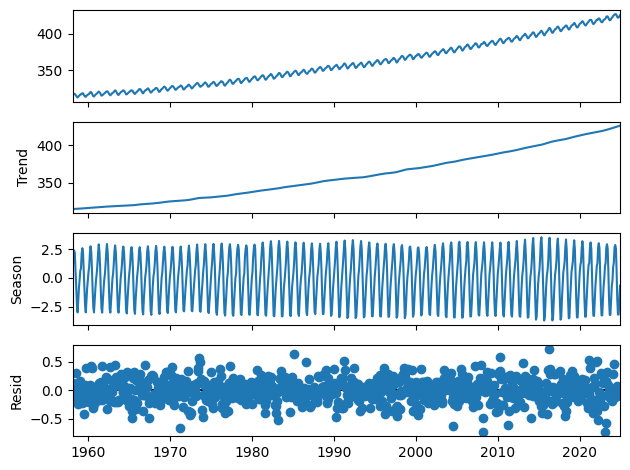

In [3]:
from statsmodels.tsa.seasonal import STL

stl = STL(co2)
res = stl.fit()
fig = res.plot()

Looks great! But notice that we did not set the `seasonal` parameter, even though we know that we're supposed to. How can we ever know what value we should set it to? 

Let's first explore what the `seasonal` parameter does and then use a graphical technique to help us decide what value we should set it to. 

## What is the `seasonal` parameter? 

The STL method is described in a 1990 paper by Cleveland et al. They propose an iterated inner loop that smooths the seasonal and trend parameters and an outer loop that can be used to provide robustness. Let's read the original source: 

> Suppose the number of observations in each period, or cycle, of the seasonal component is $n_{(p)}$. For example, if the series is monthly with a yearly periodicity, then $n_{(p)}=12$. We need to be able to refer to the subseries of values at each position of the seasonal cycle. For example, for a monthly series with $n_{(p)}=12$, the first subseries is the January values, the second is the February values, and so forth. We will refer to each of these $n_{(p)}$ subseries as a *cycle-subseries*.
>
> \[...\]
>
> Each pass of the inner loop consists of a seasonal smoothing that updates the seasonal component, followed by a trend smoothing that updates the trend component.
>
> \[...\]
>
> *Cycle-subseries Smoothing*. Each cycle-subseries of the detrended series is smoothed by loess with $q=n_{(s)}$ and $d=1$.

So let's proceed with our data and do as the authors say. We'll take the detrended series and extract each seasonal component. Then let's graph them to look at them. 

In [4]:
detrended = co2-res.trend
seasonal_subcycles = detrended.groupby(lambda ix: ix.month)

Fantastic, we have our seasonal subcycles. But now let's smooth them using a loess regression with the `seasonal` parameter we defined earlier. 

In the `statsmodels` version of `lowess`, the bandwidth parameter is defined as a fraction of the total number of observations, not as a fixed number. 

In [5]:
smooth_subcycles = []

for (month, seasonal_subcycle) in seasonal_subcycles:
    ss_ = sl.lowess(seasonal_subcycle, seasonal_subcycle.index, frac=7/seasonal_subcycle.size, return_sorted=False)
    ss = pd.Series(ss_, seasonal_subcycle.index)
    smooth_subcycles.append((month, ss))

Finally, let's compare them side by side so we can get a good idea of what is happening to each of these subcycles. 

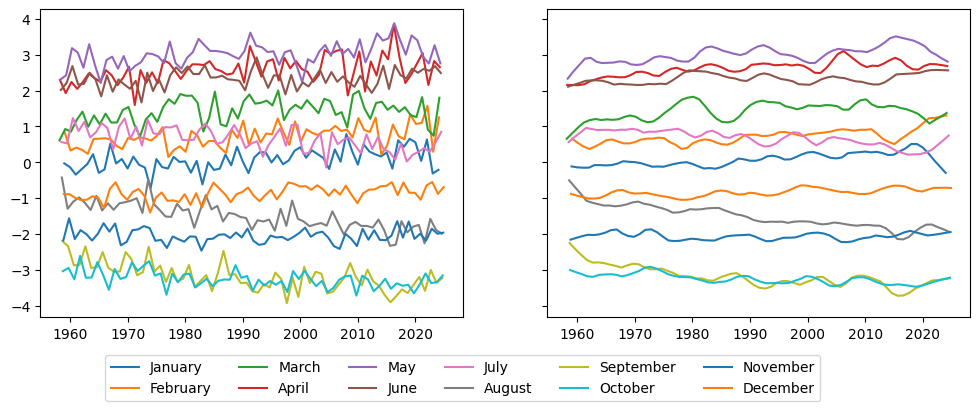

In [6]:
fig, (ax1, ax2) = mpl.pyplot.subplots(nrows=1, ncols=2, figsize=[12,4], sharey=True)
for ((mth, seasonl), (mth_, smooths)) in zip(seasonal_subcycles, smooth_subcycles):
    ax1.plot(seasonl.index, seasonl, label=calendar.month_name[mth])
    ax2.plot(smooths.index, smooths, label=calendar.month_name[mth_])
_ = ax1.legend(loc='upper center', bbox_to_anchor=(1, -0.1), ncols=6)

Of course, each of the subcycles is now much less jumpy than it used to be. The idea, you can probably see already, is that if we look at the seasonal component of our decomposition, we should see each seasonal subcycle develop reasonably smoothly. 

## What should the `seasonal` parameter be? 

So we see that the higher the seasonal parameter, the smoother the seasonal subcycles. But on the other hand, if the `seasonal` parameter is too high, we may fail to capture some evolution in the seasonal cycle. For example, if we look at our data above, we may want to capture the fact that the August series is increasing in magnitude, or what could be maybe an inverted u shape in May. To do that, let's take a look at a plot suggested by Cleveland et al. called the *Seasonal-Diagnostic Plot*. 

In [7]:
from statsmodels.graphics.tsaplots import seasonal_diagnostic_plot

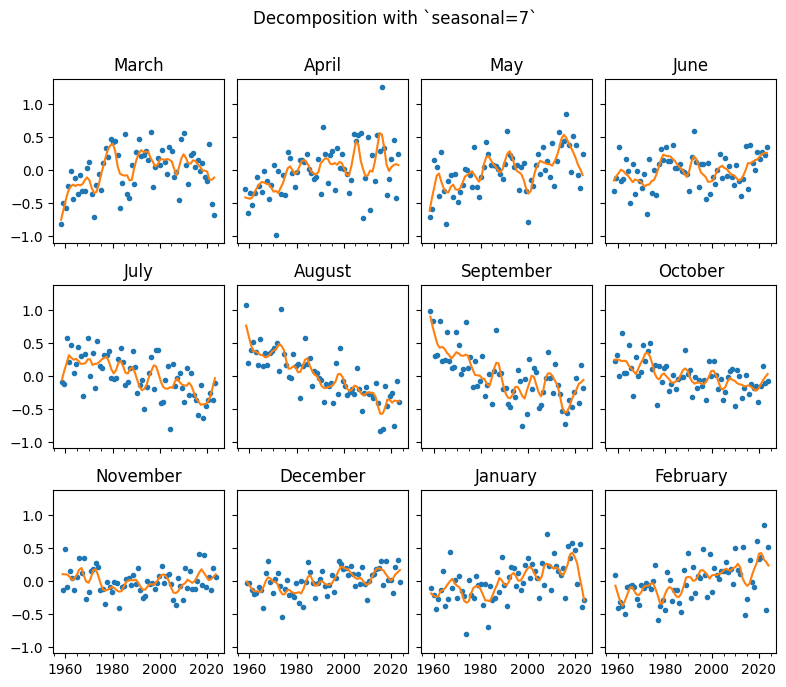

In [16]:
# The series starts in March. 
months = ['March', 'April', 'May', 'June', 'July', 'August', 'September', 
          'October', 'November', 'December', 'January', 'February']
fig = seasonal_diagnostic_plot(res, period=12, nrows=3, labels=months)
for ax in fig.get_axes():
    xax = ax.xaxis
    xax.set_major_locator(mpl.dates.YearLocator(20))
    xax.set_minor_locator(mpl.ticker.AutoMinorLocator())
_ = fig.suptitle('Decomposition with `seasonal=7`', y=1.05) 

This plot is similar to the one we did ourselves above to visualise the smoothed cycles, but you can see that the data is now centered at zero, and that each separate seasonal subcycle is plotted against the observations of the data. 

More importantly, we can see that each seasonal subcycle is quite noisy, and we may suspect that this noisiness does not reflect the actual evolution of the seasonal component of the series. Let's see how this compares to the *Seasonal-Diagnostic Plot* of a series decomposed with a higher `seasonal` parameter. 

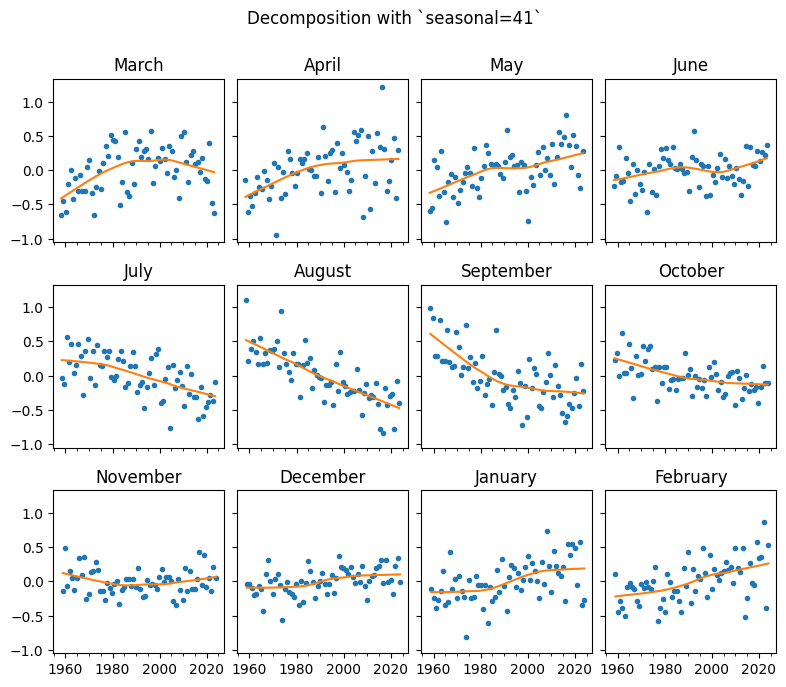

In [20]:
stl_41 = STL(co2, seasonal=41)
res_41 = stl_41.fit()
fig = seasonal_diagnostic_plot(res_41, period=12, nrows=3, labels=months)
for ax in fig.get_axes():
    xax = ax.xaxis
    xax.set_major_locator(mpl.dates.YearLocator(20))
    xax.set_minor_locator(mpl.ticker.AutoMinorLocator())
_ = fig.suptitle('Decomposition with `seasonal=41`', y=1.05) 

The observations remain the same, of course, but we can see now that the cycle subseries are much smoother. At the limit, with a high enough `seasonal` parameter, each of these will be a straight regression line. It is your judgement to decide based on this and your knowledge of the specific data series how you would like the seasonal component to evolve. The value of this parameter here looks right to me because it is evolving smoothly without year-to-year noise, but I still don't necessarily expect it to be a straight line. 

Let's finish this by comparing each of the components of the decomposition for this data with `seasonal=41` and `seasonal=7`. 

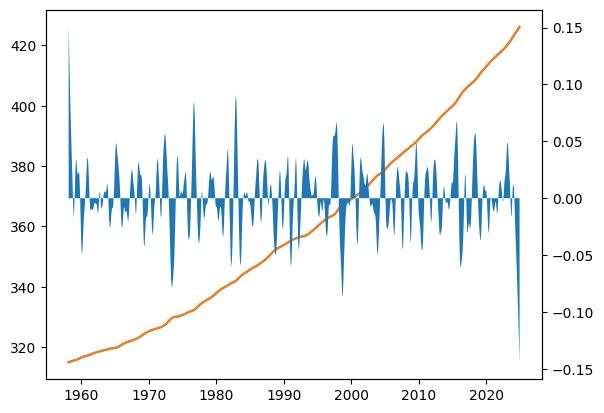

In [21]:
fig, ax1 = mpl.pyplot.subplots()
ax1.plot(res.trend.index, res.trend)
ax1.plot(res.trend.index, res_41.trend)
ax2 = ax1.twinx()
_ = ax2.fill_between(res.trend.index, res.trend-res_41.trend)

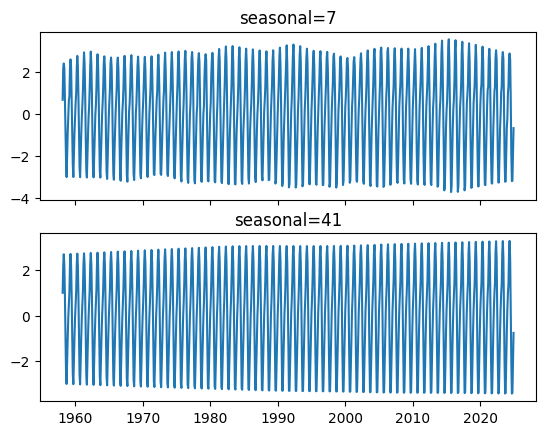

In [26]:
fig, (ax1, ax2) = mpl.pyplot.subplots(nrows=2, ncols=1, sharex=True)
ax1.plot(res.seasonal.index, res.seasonal)
ax1.set_title('seasonal=7')
ax2.plot(res_41.seasonal.index, res_41.seasonal)
_ = ax2.set_title('seasonal=41')

What a difference that makes! The trend line is basically indistinguishable, but the seasonal parameter has a much smoother evolution. 

You now understand how to use the `seasonal` parameter to determine how the seasonal component of your decomposed time series will evolve and in the *Seasonal-Diagnostic Plot* you have a tool to help you do it. 